In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
product_name=[]
pprices=[]
properties=[]
description=[]

In [7]:
for i in range(2,50): 
    url="https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=da1e0134-c739-4754-a310-e4e869b26ea2&page="+str(i)
# Define a browser-like User Agent
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

# Make the request with the custom User Agent
    r = requests.get(url, headers=headers)
    soup=BeautifulSoup(r.text,'lxml')
    names=soup.find_all("div",class_="KzDlHZ")
    for i in names:
        name=i.text
        product_name.append(name)
    prices=soup.find_all("div",class_="Nx9bqj _4b5DiR")
    for i in prices:
        name=i.text
        pprices.append(name)
    desc=soup.find_all("ul",class_="G4BRas")

    for i in desc:
        name=i.text
        description.append(name)

In [103]:

data=pd.DataFrame({"product_name":pd.Series(product_name),"prices":pd.Series(pprices),"Description":pd.Series(description)})

In [105]:
data.to_csv("D:/5th semester subjects/flipkartphones.csv")


In [107]:
print(len(pprices[:]))

960


In [109]:
data

,product_name,prices,Description
0,"vivo V40 Pro 5G (Titanium Grey, 256 GB)","₹49,999",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full...
1,"Samsung Galaxy A55 5G (Awesome Iceblue, 256 GB)","₹36,999",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...
2,"OnePlus Nord 5 5G (Marble Sands, 256 GB)","₹34,280",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...
3,"Xiaomi 14 CIVI (Cruise Blue, 256 GB)","₹36,999",8 GB RAM | 256 GB ROM16.64 cm (6.55 inch) Disp...
4,"vivo V60 5G (Moonlit Blue, 256 GB)","₹40,999",12 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Disp...
...,...,...,...
955,Kechaoda K33,₹998,32 MB RAM | 32 GB ROM | Expandable Upto 32 MB3...
956,Samsung Guru 1200,₹891,4 MB RAM | 10 MB ROM3.86 cm (1.52 inch) Displa...
957,Jio JioBharat K2 Keypad Mobile,₹987,512 MB RAM | 4 GB ROM4.5 cm (1.77 inch) Displa...
958,"Infinix HOT 60i 5G (Monsoon Green, 128 GB)","₹9,499",4 GB RAM | 128 GB ROM17.14 cm (6.75 inch) HD+ ...


In [111]:
data.isnull().sum()

product_name    0
prices          0
Description     0
dtype: int64

In [113]:
data['product_name']=data['product_name'].str.split(' ').str.slice(0,1).str.join(' ')

In [115]:
data

,product_name,prices,Description
0,vivo,"₹49,999",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full...
1,Samsung,"₹36,999",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...
2,OnePlus,"₹34,280",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...
3,Xiaomi,"₹36,999",8 GB RAM | 256 GB ROM16.64 cm (6.55 inch) Disp...
4,vivo,"₹40,999",12 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Disp...
...,...,...,...
955,Kechaoda,₹998,32 MB RAM | 32 GB ROM | Expandable Upto 32 MB3...
956,Samsung,₹891,4 MB RAM | 10 MB ROM3.86 cm (1.52 inch) Displa...
957,Jio,₹987,512 MB RAM | 4 GB ROM4.5 cm (1.77 inch) Displa...
958,Infinix,"₹9,499",4 GB RAM | 128 GB ROM17.14 cm (6.75 inch) HD+ ...


In [117]:
desc_split = data['Description'].str.split('|', expand=True)

# Assign to new columns after cleaning
data['RAM'] = desc_split[0].str.strip()
data['ROM'] = desc_split[1].str.strip()
data['Display_Size'] = desc_split[2].str.strip().str.replace(' Display', '', regex=False)



In [119]:
data

,product_name,prices,Description,RAM,ROM,Display_Size
0,vivo,"₹49,999",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full...,8 GB RAM,256 GB ROM17.22 cm (6.78 inch) Full HD+ Displa...,50MP Front Camera5500 mAh BatteryDimensity 920...
1,Samsung,"₹36,999",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,256 GB ROM,Expandable Upto 1 TB16.76 cm (6.6 inch) Full H...
2,OnePlus,"₹34,280",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...,12 GB RAM,256 GB ROM17.35 cm (6.83 inch) Display50MP Rea...,None
3,Xiaomi,"₹36,999",8 GB RAM | 256 GB ROM16.64 cm (6.55 inch) Disp...,8 GB RAM,256 GB ROM16.64 cm (6.55 inch) Display50MP Rea...,32MP + 32MP Dual Front Camera4700 mAh Battery8...
4,vivo,"₹40,999",12 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Disp...,12 GB RAM,256 GB ROM17.2 cm (6.77 inch) Display50MP + 8M...,50MP Front Camera6500 mAh Battery7 Gen 4 Proce...
...,...,...,...,...,...,...
955,Kechaoda,₹998,32 MB RAM | 32 GB ROM | Expandable Upto 32 MB3...,32 MB RAM,32 GB ROM,Expandable Upto 32 MB3.66 cm (1.44 inch) NA0.3...
956,Samsung,₹891,4 MB RAM | 10 MB ROM3.86 cm (1.52 inch) Displa...,4 MB RAM,10 MB ROM3.86 cm (1.52 inch) Display800 mAh Ba...,None
957,Jio,₹987,512 MB RAM | 4 GB ROM4.5 cm (1.77 inch) Displa...,512 MB RAM,4 GB ROM4.5 cm (1.77 inch) Display2MP Rear Cam...,None
958,Infinix,"₹9,499",4 GB RAM | 128 GB ROM17.14 cm (6.75 inch) HD+ ...,4 GB RAM,128 GB ROM17.14 cm (6.75 inch) HD+ Display50MP...,5MP Front Camera6000 mAh BatteryDimensity 6400...


In [121]:
# Extract RAM (e.g., "12 GB RAM")
data['RAM'] = data['Description'].str.extract(r'(\d+\s*GB RAM)')

# Extract ROM (e.g., "512 GB ROM")
data['ROM'] = data['Description'].str.extract(r'(\d+\s*GB ROM)')

# Extract Display Size (e.g., "16.64 cm (6.55 inch)")
data['Display_Size'] = data['Description'].str.extract(r'(\d+\.\d+\s*cm\s*\([^)]+\))')

# Extract Camera (handles both "Rear Camera" and "Front Camera")
data['Camera'] = data['Description'].str.extract(r'([\d+MP\s\+\&]+(?:Rear|Front)\sCamera)')

# Extract Battery (e.g., "5000 mAh Battery")
data['Battery'] = data['Description'].str.extract(r'(\d+\s*mAh\s*Battery)')

In [123]:
data

,product_name,prices,Description,RAM,ROM,Display_Size,Camera,Battery
0,vivo,"₹49,999",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full...,8 GB RAM,256 GB ROM,17.22 cm (6.78 inch),50MP Front Camera,5500 mAh Battery
1,Samsung,"₹36,999",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
2,OnePlus,"₹34,280",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...,12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800 mAh Battery
3,Xiaomi,"₹36,999",8 GB RAM | 256 GB ROM16.64 cm (6.55 inch) Disp...,8 GB RAM,256 GB ROM,16.64 cm (6.55 inch),50MP Rear Camera,4700 mAh Battery
4,vivo,"₹40,999",12 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Disp...,12 GB RAM,256 GB ROM,17.2 cm (6.77 inch),50MP Front Camera,6500 mAh Battery
...,...,...,...,...,...,...,...,...
955,Kechaoda,₹998,32 MB RAM | 32 GB ROM | Expandable Upto 32 MB3...,NaN,32 GB ROM,3.66 cm (1.44 inch),0MP Front Camera,800 mAh Battery
956,Samsung,₹891,4 MB RAM | 10 MB ROM3.86 cm (1.52 inch) Displa...,NaN,NaN,3.86 cm (1.52 inch),NaN,800 mAh Battery
957,Jio,₹987,512 MB RAM | 4 GB ROM4.5 cm (1.77 inch) Displa...,NaN,4 GB ROM,4.5 cm (1.77 inch),2MP Rear Camera,1000 mAh Battery
958,Infinix,"₹9,499",4 GB RAM | 128 GB ROM17.14 cm (6.75 inch) HD+ ...,4 GB RAM,128 GB ROM,17.14 cm (6.75 inch),50MP Rear Camera,6000 mAh Battery


In [125]:
data=data.drop(columns=['Description'])

In [127]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,vivo,"₹49,999",8 GB RAM,256 GB ROM,17.22 cm (6.78 inch),50MP Front Camera,5500 mAh Battery
1,Samsung,"₹36,999",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
2,OnePlus,"₹34,280",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800 mAh Battery
3,Xiaomi,"₹36,999",8 GB RAM,256 GB ROM,16.64 cm (6.55 inch),50MP Rear Camera,4700 mAh Battery
4,vivo,"₹40,999",12 GB RAM,256 GB ROM,17.2 cm (6.77 inch),50MP Front Camera,6500 mAh Battery
...,...,...,...,...,...,...,...
955,Kechaoda,₹998,NaN,32 GB ROM,3.66 cm (1.44 inch),0MP Front Camera,800 mAh Battery
956,Samsung,₹891,NaN,NaN,3.86 cm (1.52 inch),NaN,800 mAh Battery
957,Jio,₹987,NaN,4 GB ROM,4.5 cm (1.77 inch),2MP Rear Camera,1000 mAh Battery
958,Infinix,"₹9,499",4 GB RAM,128 GB ROM,17.14 cm (6.75 inch),50MP Rear Camera,6000 mAh Battery


In [129]:
data.isnull().sum()

product_name      0
prices            0
RAM             187
ROM             159
Display_Size      2
Camera           30
Battery         137
dtype: int64

In [131]:
data['Battery'] = (
    data['Battery']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)


In [133]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,vivo,"₹49,999",8 GB RAM,256 GB ROM,17.22 cm (6.78 inch),50MP Front Camera,5500.0
1,Samsung,"₹36,999",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000.0
2,OnePlus,"₹34,280",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800.0
3,Xiaomi,"₹36,999",8 GB RAM,256 GB ROM,16.64 cm (6.55 inch),50MP Rear Camera,4700.0
4,vivo,"₹40,999",12 GB RAM,256 GB ROM,17.2 cm (6.77 inch),50MP Front Camera,6500.0
...,...,...,...,...,...,...,...
955,Kechaoda,₹998,NaN,32 GB ROM,3.66 cm (1.44 inch),0MP Front Camera,800.0
956,Samsung,₹891,NaN,NaN,3.86 cm (1.52 inch),NaN,800.0
957,Jio,₹987,NaN,4 GB ROM,4.5 cm (1.77 inch),2MP Rear Camera,1000.0
958,Infinix,"₹9,499",4 GB RAM,128 GB ROM,17.14 cm (6.75 inch),50MP Rear Camera,6000.0


In [135]:
data['Camera'] = (
    data['Camera']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [137]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,vivo,"₹49,999",8 GB RAM,256 GB ROM,17.22 cm (6.78 inch),50.0,5500.0
1,Samsung,"₹36,999",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32.0,5000.0
2,OnePlus,"₹34,280",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50.0,6800.0
3,Xiaomi,"₹36,999",8 GB RAM,256 GB ROM,16.64 cm (6.55 inch),50.0,4700.0
4,vivo,"₹40,999",12 GB RAM,256 GB ROM,17.2 cm (6.77 inch),50.0,6500.0
...,...,...,...,...,...,...,...
955,Kechaoda,₹998,NaN,32 GB ROM,3.66 cm (1.44 inch),0.0,800.0
956,Samsung,₹891,NaN,NaN,3.86 cm (1.52 inch),NaN,800.0
957,Jio,₹987,NaN,4 GB ROM,4.5 cm (1.77 inch),2.0,1000.0
958,Infinix,"₹9,499",4 GB RAM,128 GB ROM,17.14 cm (6.75 inch),50.0,6000.0


In [139]:
data['Display_Size'] = (
    data['Display_Size']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [141]:
data['ROM'] = (
    data['ROM']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [143]:
data.isnull().sum()

product_name      0
prices            0
RAM             187
ROM             159
Display_Size      2
Camera           56
Battery         137
dtype: int64

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  960 non-null    object 
 1   prices        960 non-null    object 
 2   RAM           773 non-null    object 
 3   ROM           801 non-null    float64
 4   Display_Size  958 non-null    float64
 5   Camera        904 non-null    float64
 6   Battery       823 non-null    float64
dtypes: float64(4), object(3)
memory usage: 52.6+ KB


In [147]:
data['prices'] = data['prices'].str.replace(r'[^0-9]', '', regex=True).astype(int)

In [149]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,vivo,49999,8 GB RAM,256.0,17.0,50.0,5500.0
1,Samsung,36999,8 GB RAM,256.0,16.0,32.0,5000.0
2,OnePlus,34280,12 GB RAM,256.0,17.0,50.0,6800.0
3,Xiaomi,36999,8 GB RAM,256.0,16.0,50.0,4700.0
4,vivo,40999,12 GB RAM,256.0,17.0,50.0,6500.0
...,...,...,...,...,...,...,...
955,Kechaoda,998,NaN,32.0,3.0,0.0,800.0
956,Samsung,891,NaN,NaN,3.0,NaN,800.0
957,Jio,987,NaN,4.0,4.0,2.0,1000.0
958,Infinix,9499,4 GB RAM,128.0,17.0,50.0,6000.0


In [151]:
data['RAM'] = (
    data['RAM']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [153]:
pd.get_dummies(data,columns=['product_name'],drop_first=True)

,prices,RAM,ROM,Display_Size,Camera,Battery,product_name_ANGAGE,product_name_ASUS,product_name_Ai+,product_name_Alcatel,...,product_name_Snexian,product_name_Tecno,product_name_Xiaomi,product_name_amaq,product_name_hmd,product_name_itel,product_name_oneme,product_name_realme,product_name_ringme,product_name_vivo
0,49999,8.0,256.0,17.0,50.0,5500.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,36999,8.0,256.0,16.0,32.0,5000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,34280,12.0,256.0,17.0,50.0,6800.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36999,8.0,256.0,16.0,50.0,4700.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,40999,12.0,256.0,17.0,50.0,6500.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,998,NaN,32.0,3.0,0.0,800.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956,891,NaN,NaN,3.0,NaN,800.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
957,987,NaN,4.0,4.0,2.0,1000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
958,9499,4.0,128.0,17.0,50.0,6000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,vivo,49999,8.0,256.0,17.0,50.0,5500.0
1,Samsung,36999,8.0,256.0,16.0,32.0,5000.0
2,OnePlus,34280,12.0,256.0,17.0,50.0,6800.0
3,Xiaomi,36999,8.0,256.0,16.0,50.0,4700.0
4,vivo,40999,12.0,256.0,17.0,50.0,6500.0
...,...,...,...,...,...,...,...
955,Kechaoda,998,NaN,32.0,3.0,0.0,800.0
956,Samsung,891,NaN,NaN,3.0,NaN,800.0
957,Jio,987,NaN,4.0,4.0,2.0,1000.0
958,Infinix,9499,4.0,128.0,17.0,50.0,6000.0


In [157]:
data.isnull().sum()

product_name      0
prices            0
RAM             187
ROM             159
Display_Size      2
Camera           56
Battery         137
dtype: int64

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 900x1900 with 0 Axes>

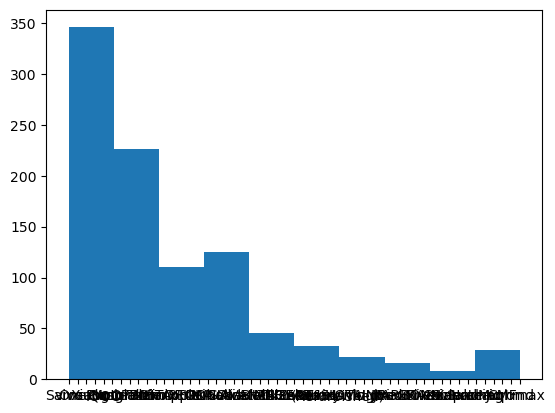

<Figure size 900x1900 with 0 Axes>

In [161]:
plt.hist(data["product_name"] )
plt.figure(figsize=(9,19))

In [163]:
count=data['product_name'].value_counts()

In [165]:
data['product_name']= data['product_name'].str.lower()


In [167]:
data['product_name']=data['product_name'].replace(['mi','readmi','xiaomi'],'readmi')

In [219]:
data.describe()

,prices,RAM,ROM,Display_Size,Camera,Battery
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,23493.425000,56.656250,177.242708,67.937500,25.548958,4650.403125
std,22279.621114,1512.633359,108.165008,824.795291,21.343355,1661.175934
min,498.000000,1.000000,4.000000,1.000000,0.000000,700.000000
25%,8499.000000,6.000000,128.000000,15.000000,10.000000,4600.000000
50%,17999.000000,8.000000,128.000000,16.000000,16.000000,5000.000000
75%,35990.000000,8.000000,256.000000,17.000000,50.000000,5500.000000
max,174999.000000,46875.000000,512.000000,12812.000000,200.000000,7300.000000


In [211]:
data["RAM"]=data['RAM'].fillna(data["RAM"].median())

In [213]:
data["ROM"]=data['ROM'].fillna(data["ROM"].median())
data["Display_Size"]=data['Display_Size'].fillna(data["Display_Size"].median())
data["Camera"]=data['Camera'].fillna(data["Camera"].median())
data["Battery"]=data['Battery'].fillna(data["Battery"].median())

In [215]:
data.isnull().sum()

product_name    0
prices          0
RAM             0
ROM             0
Display_Size    0
Camera          0
Battery         0
dtype: int64

In [233]:
data=pd.get_dummies(data,columns=['product_name'],drop_first=True)

<Axes: >

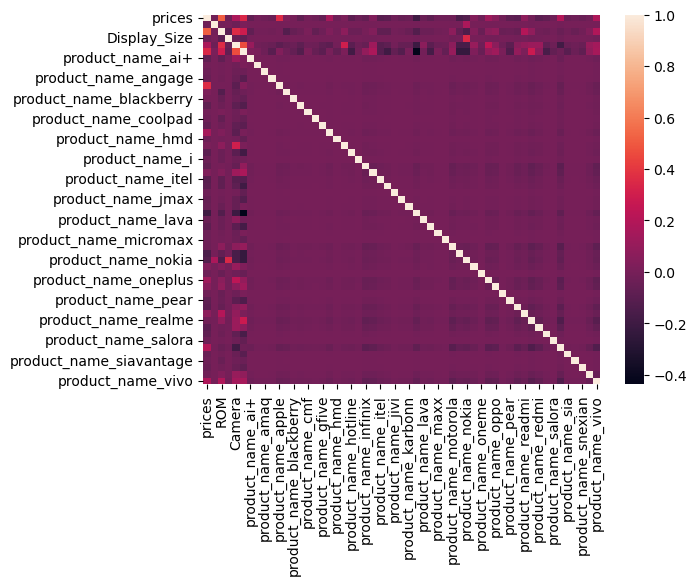

In [235]:
sns.heatmap(data.corr())

In [311]:
x=data.drop(columns='prices')
y=data['prices']

In [293]:
x

,RAM,ROM,Display_Size,Camera,Battery,product_name_ai+,product_name_alcatel,product_name_amaq,product_name_angage,product_name_apple,...,product_name_realme,product_name_redmi,product_name_ringme,product_name_salora,product_name_samsung,product_name_sia,product_name_siavantage,product_name_snexian,product_name_tecno,product_name_vivo
0,8.0,256.0,17.0,50.0,5500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,8.0,256.0,16.0,32.0,5000.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,12.0,256.0,17.0,50.0,6800.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8.0,256.0,16.0,50.0,4700.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12.0,256.0,17.0,50.0,6500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,8.0,32.0,3.0,0.0,800.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956,8.0,128.0,3.0,16.0,800.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
957,8.0,4.0,4.0,2.0,1000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
958,4.0,128.0,17.0,50.0,6000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [333]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [317]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [337]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [339]:
pred=lr.predict(x_test)

In [341]:
r2_score(pred,y_test)

-0.005773974869140108

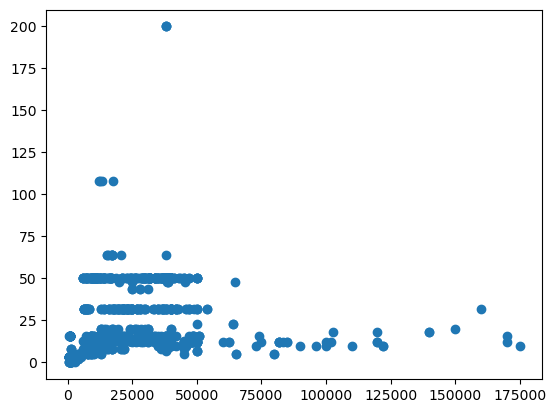

In [361]:
plt.scatter(data['prices'],data["Camera"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2261ac92480>,
 'caps': [<matplotlib.lines.Line2D at 0x2261ac93b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2261ac92ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2261956a8a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2261959b620>],
 'means': []}

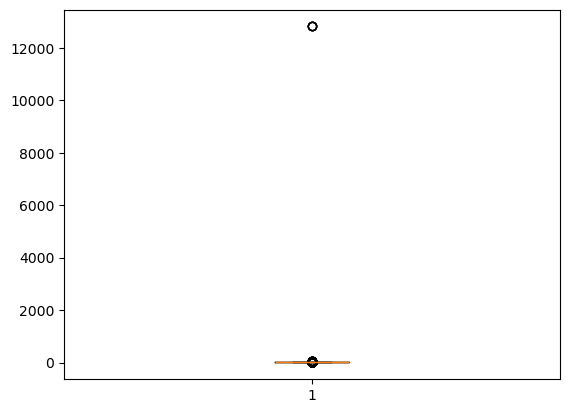

In [375]:
plt.boxplot(data["Display_Size"])